In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import pickle

In [5]:
path = '/content/drive/MyDrive/Mineração de Dados/IF998 - Missões SMD/Projeto/'

# Importando variáveis de treino e teste desenvolvidos na etapa de preparação dos dados

In [6]:
def open_train_test():
  with open(path+'train_test.pkl','rb') as f:
    return pickle.load(f)

In [7]:
X_train, X_test, y_train, y_test = open_train_test()

# Ensemble Voting
Na primeira etapa vamos importar os modelos treinados anteriormente, sendo eles: KNN, Rede Neural e Árvore de Decisão

In [20]:
with open(path+'KNN_model.pkl','rb') as f:
  KNN = pickle.load(f)[0]

with open(path+'DT_model.pkl','rb') as f:
  DT = pickle.load(f)[0]

with open(path+'MLP_model.pkl','rb') as f:
  MLP = pickle.load(f)[0]

estimators = [('DT', DT), ('KNN', KNN), ('MLP', MLP)]

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

voting = VotingClassifier(estimators)

In [22]:
VOT = voting.fit(X_train, y_train)
y_pred = VOT.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [23]:
print('1: Masculino\n2: Feminino\n',classification_report(y_test, y_pred))

1: Masculino
2: Feminino
               precision    recall  f1-score   support

           1       0.94      0.84      0.89       704
           2       0.85      0.94      0.90       692

    accuracy                           0.89      1396
   macro avg       0.90      0.89      0.89      1396
weighted avg       0.90      0.89      0.89      1396



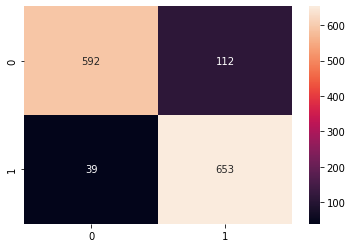

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

# Exportando modelo treinado

In [30]:
with open(path+'VOTING_model.pkl', 'wb') as f:
    pickle.dump([VOT], f)